In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import math
%matplotlib inline


In [252]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [253]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [254]:
# gets all column names and returns index object
cols = confirmed_df.keys()

In [255]:
# returns only the dates columns
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

# gets date information from columns in an index object
dates = confirmed.keys()

In [256]:
# gets total current tallies and also creates list of daily statistics
world_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []
active_cases = []

for i in dates:
    # the .sum() function adds all values in axis, i.e. daily stats
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    active_cases_tot = confirmed_sum - (death_sum + recovered_sum)
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)
    active_cases.append(active_cases_tot)

In [257]:
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
active_cases = np.array(active_cases).reshape(-1, 1)

In [258]:
world_cases = pd.DataFrame(world_cases, index=dates, columns = ['World Cases'])
total_deaths = pd.DataFrame(total_deaths, index=dates, columns = ['Total Deaths'])
total_recovered = pd.DataFrame(total_recovered, index=dates, columns = ['Total Recoveries'])
mortality_rate = pd.DataFrame(mortality_rate, index=dates, columns = ['Cumulative Mortality Rate'])
active_cases = pd.DataFrame(active_cases, index=dates, columns = ['Active Cases'])

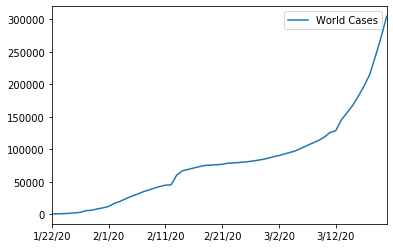

In [259]:
world_cases.plot(kind='line')

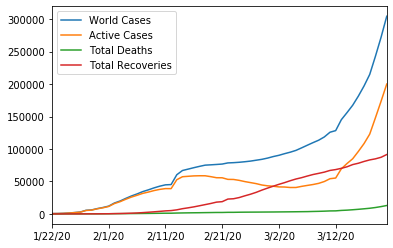

In [260]:
pd.concat([world_cases, active_cases, total_deaths, total_recovered], axis=1).plot()

In [261]:
# new cases per day
new_cases_daily = world_cases
new_cases_daily.rename(columns={'World Cases': 'New Cases'}, inplace=True)
new_cases_daily = new_cases_daily.diff(axis=0)
new_cases_daily.fillna(555, inplace=True)

In [262]:
new_cases_daily['New Cases'] = new_cases_daily['New Cases'].astype(int)

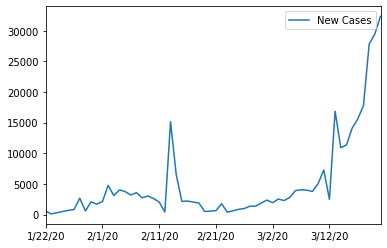

In [263]:
new_cases_daily.plot(kind='line')

In [264]:
new_deaths_daily = total_deaths
new_deaths_daily.rename(columns={'Total Deaths': 'New Deaths'}, inplace=True)
new_deaths_daily = new_deaths_daily.diff(axis=0)
new_deaths_daily.fillna(17, inplace=True)

In [265]:
new_deaths_daily['New Deaths'] = new_deaths_daily['New Deaths'].astype(int)

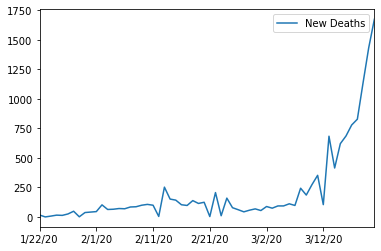

In [266]:
new_deaths_daily.plot(kind='line')

In [267]:
new_recoveries_daily = total_recovered
new_recoveries_daily.rename(columns={'Total Recoveries': 'New Recoveries'}, inplace=True)
new_recoveries_daily = new_recoveries_daily.diff(axis=0)
new_recoveries_daily.fillna(28, inplace=True)

In [268]:
new_recoveries_daily['New Recoveries'] = new_recoveries_daily['New Recoveries'].astype(int)

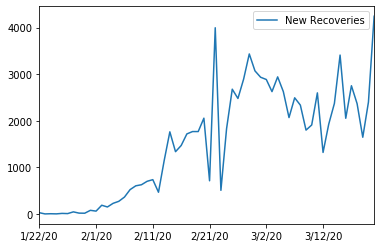

In [269]:
new_recoveries_daily.plot(kind='line')

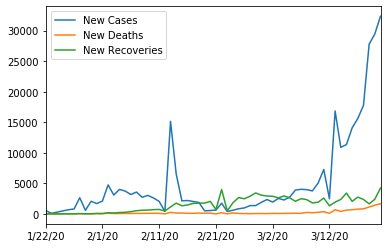

In [270]:
pd.concat([new_cases_daily, new_deaths_daily, new_recoveries_daily], axis=1).plot()

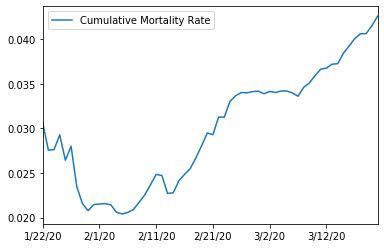

In [271]:
mortality_rate.plot(kind='line')

In [272]:
confirmed_by_country = confirmed_df.drop(['Province/State', 'Lat', 'Long'], axis=1)
deaths_by_country = deaths_df.drop(['Province/State', 'Lat', 'Long'], axis=1)
recoveries_by_country = recoveries_df.drop(['Province/State', 'Lat', 'Long'], axis=1)

In [273]:
# gets list of all countries with cases
countries = confirmed_by_country['Country/Region'].unique()
print(len(countries))

166


In [274]:
confirmed_by_country = confirmed_by_country.groupby(['Country/Region']).sum()
deaths_by_country = deaths_by_country.groupby(['Country/Region']).sum()
recoveries_by_country = recoveries_by_country.groupby(['Country/Region']).sum()

In [275]:
confirmed_by_country

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,10,15,23,33,43
Venezuela,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,17,33,36,42,42,70
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,18,30,30,31,38,39,47,53,56,61,66,75,85,91,94


In [276]:
confirmed_by_country = confirmed_by_country.swapaxes('index', 'columns')
deaths_by_country = deaths_by_country.swapaxes('index', 'columns')
recoveries_by_country = recoveries_by_country.swapaxes('index', 'columns')

In [277]:
# renames the index
confirmed_by_country.index.names = ['Dates']

In [278]:
confirmed_by_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,"Bahamas, The",Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,Canada,Cape Verde,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Cruise Ship,Cuba,Cyprus,Czechia,Denmark,Djibouti,Dominican Republic,East Timor,Ecuador,Egypt,...,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Taiwan*,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
Dates,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,3,0,5,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,3,0,7,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2075,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,4,0,8,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0


In [279]:
italy_cum = pd.concat([confirmed_by_country['Italy'], deaths_by_country['Italy'], recoveries_by_country['Italy']], axis=1)
italy_cum.columns = ['Italian Confirmed Cases', 'Italian Deaths', 'Italian Recoveries']
italy_cum['Italian Morality Rate'] = italy_cum['Italian Deaths'] / italy_cum['Italian Confirmed Cases']
italy_cum.dropna(inplace=True)

# adds new column days_since_detection
days_since_detection = len(italy_cum.index.get_level_values(0))
days_since_detection = np.array([i for i in range(days_since_detection)]).reshape(-1, 1)
italy_cum['Days Since Detection'] = days_since_detection
italy_cum.set_index('Days Since Detection', inplace=True)

In [280]:
usa_cum = pd.concat([confirmed_by_country['US'], deaths_by_country['US'], recoveries_by_country['US']], axis=1)
usa_cum.columns = ['American Confirmed Cases', 'American Deaths', 'American Recoveries']
usa_cum['American Morality Rate'] = usa_cum['American Deaths'] / usa_cum['American Confirmed Cases']
usa_cum.dropna(inplace=True)

# adds new column days_since_detection
days_since_detection = len(usa_cum.index.get_level_values(0))
days_since_detection = np.array([i for i in range(days_since_detection)]).reshape(-1, 1)
usa_cum['Days Since Detection'] = days_since_detection
usa_cum.set_index('Days Since Detection', inplace=True)

In [281]:
china_cum = pd.concat([confirmed_by_country['China'], deaths_by_country['China'], recoveries_by_country['China']], axis=1)
china_cum.columns = ['Chinese Confirmed Cases', 'Chinese Deaths', 'Chinese Recoveries']
china_cum['Chinese Morality Rate'] = china_cum['Chinese Deaths'] / china_cum['Chinese Confirmed Cases']
china_cum.dropna(inplace=True)

# adds new column days_since_detection
days_since_detection = len(china_cum.index.get_level_values(0))
days_since_detection = np.array([i for i in range(days_since_detection)]).reshape(-1, 1)
china_cum['Days Since Detection'] = days_since_detection
china_cum.set_index('Days Since Detection', inplace=True)

In [282]:
sk_cum = pd.concat([confirmed_by_country['Korea, South'], deaths_by_country['Korea, South'], recoveries_by_country['Korea, South']], axis=1)
sk_cum.columns = ['South Korean Confirmed Cases', 'South Korean Deaths', 'South Korean Recoveries']
sk_cum['South Korean Morality Rate'] = sk_cum['South Korean Deaths'] / sk_cum['South Korean Confirmed Cases']
sk_cum.dropna(inplace=True)

# adds new column days_since_detection
days_since_detection = len(sk_cum.index.get_level_values(0))
days_since_detection = np.array([i for i in range(days_since_detection)]).reshape(-1, 1)
sk_cum['Days Since Detection'] = days_since_detection
sk_cum.set_index('Days Since Detection', inplace=True)

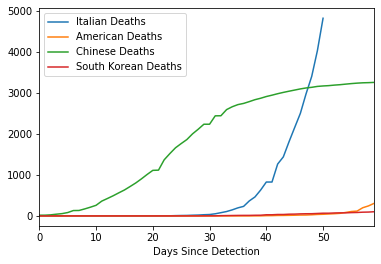

In [283]:
pd.concat([italy_cum['Italian Deaths'], usa_cum['American Deaths'], china_cum['Chinese Deaths'], sk_cum['South Korean Deaths']], axis=1).plot()

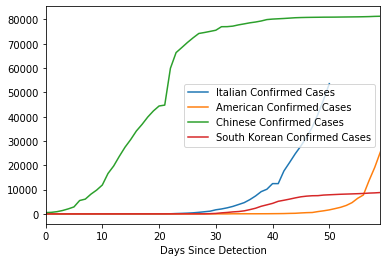

In [284]:
pd.concat([italy_cum['Italian Confirmed Cases'], usa_cum['American Confirmed Cases'], china_cum['Chinese Confirmed Cases'], sk_cum['South Korean Confirmed Cases']], axis=1).plot()

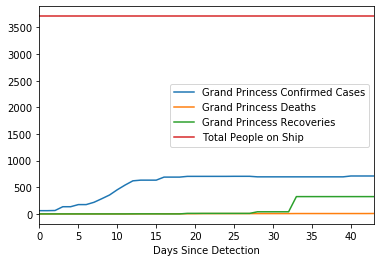

In [285]:
cruise_cum = pd.concat([confirmed_by_country['Cruise Ship'], deaths_by_country['Cruise Ship'], recoveries_by_country['Cruise Ship']], axis=1)
cruise_cum.columns = ['Grand Princess Confirmed Cases', 'Grand Princess Deaths', 'Grand Princess Recoveries']
cruise_cum['Grand Princess Mortality Rate'] = cruise_cum['Grand Princess Deaths'] / cruise_cum['Grand Princess Confirmed Cases']
cruise_cum.dropna(inplace=True)
cruise_cum.drop(['Grand Princess Mortality Rate'], axis=1, inplace=True)

# adds new column days_since_detection
days_since_detection = len(cruise_cum.index.get_level_values(0))
days_since_detection = np.array([i for i in range(days_since_detection)]).reshape(-1, 1)
cruise_cum['Days Since Detection'] = days_since_detection
cruise_cum.set_index('Days Since Detection', inplace=True)

cruise_cum['Total People on Ship'] = 3711

cruise_cum.plot()

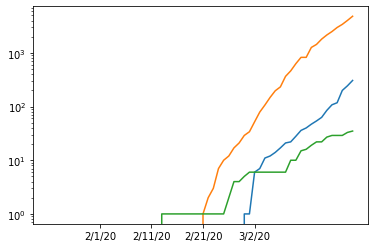

In [286]:
compare = pd.concat([deaths_by_country['US'], deaths_by_country['Italy'], deaths_by_country['Japan']], axis=1)

plt.plot(compare)
plt.yscale('log')
plt.xticks(np.arange(10,50, step=10))
plt.show()

In [287]:
# code allows for importing of http
import io
import requests

url="https://covidtracking.com/api/us/daily.csv"
s=requests.get(url).content
usa_detail = pd.read_csv(io.StringIO(s.decode('utf-8')))
usa_detail.fillna(0, downcast='infer', inplace=True)
usa_detail.drop(['date', 'states', 'negative', 'pending', 'total'], axis=1, inplace=True)
usa_detail.index.names = ['Days Since Detection']
usa_detail.rename(columns={'positive': 'American Confirmed', 'posNeg': 'American Tested', 'death': 'American Deaths'}, inplace=True)

In [288]:
sk_detail_time = pd.read_csv('https://raw.githubusercontent.com/jihoo-kim/Data-Science-for-COVID-19/master/dataset/Time/Time.csv')
sk_detail_time.drop(['date', 'time', 'negative', 'released'], axis=1, inplace=True)
sk_detail_time.index.names = ['Days Since Detection']
sk_detail_time.rename(columns={'test': 'SK Tested', 'confirmed': 'SK Confirmed', 'deceased': 'SK Deaths'}, inplace=True)

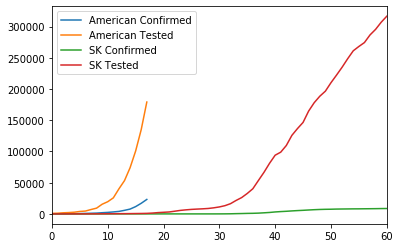

In [289]:
pd.concat([usa_detail['American Confirmed'], usa_detail['American Tested'], sk_detail_time['SK Confirmed'], sk_detail_time['SK Tested']], axis=1).plot()

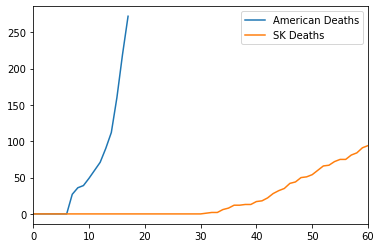

In [290]:
pd.concat([usa_detail['American Deaths'], sk_detail_time['SK Deaths']], axis=1).plot()

In [291]:
# use 2020 freedom index from Freedom House

FH = pd.read_csv('./FreedomHouse2020.csv')
FH

,Country/Territory,Total
0,Abkhazia,40
1,Afghanistan,27
2,Albania,67
3,Algeria,34
4,Andorra,94
...,...,...
205,West Bank,25
206,Western Sahara,4
207,Yemen,11
208,Zambia,54


In [292]:
current_deaths = deaths_by_country.iloc[[-1]]

c_cols = current_deaths.keys()

for i in c_cols:
    # tests if any columns are non-zero
    if current_deaths[i].any():
        break
    else:
        current_deaths = deaths_by_country.iloc[[-2]]

In [293]:
current_deaths = current_deaths.swapaxes('index', 'columns')

In [294]:
for i in c_cols:
    # checks if country has 100 or more deaths, and then drops if false
    if current_deaths.loc[i].le(99).bool():
        current_deaths.drop(i, inplace=True)

In [295]:
current_deaths.rename(columns={current_deaths.columns[0]: 'Current Deaths'}, inplace=True)

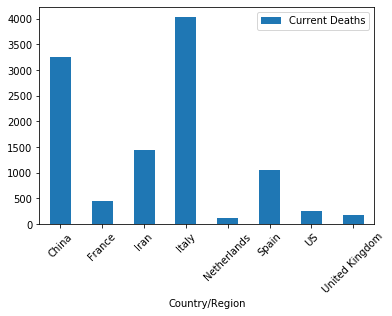

In [296]:
current_deaths.plot(kind='bar', rot=45)

In [297]:
current_deaths

,Current Deaths
Country/Region,
China,3253
France,450
Iran,1433
Italy,4032
Netherlands,107
Spain,1043
US,244
United Kingdom,178


In [298]:
# TODO country comparison mortality per 1,000 people
# TODO plot against GDP per capita

demo = pd.read_csv('./demographics_data.csv')
demo

,index,Population,Density_(km2),Area_(km2),Migrants_(net),MedianAge,Urban_(%),WorldShare_(%),GDP_per_capita_PPP,GNI_per_capita_PPP,passengers_per_day,CountryID,Latitude,Longitude,Last_(Celsius),Previous_(Celsius),TempRecordDate
0,China,1439323776,153,9388211,-348399,38,61,0.1847,16842,18170,1195024,CN,35.861660,104.195397,-5.24,0.67,15-Dec
1,France,65273511,119,547557,36527,42,82,0.0084,44033,46360,178190,FR,46.227638,2.213749,7.70,9.65,15-Dec
2,Iran,83992949,52,1628550,-55000,32,76,0.0108,20885,21050,41106,IR,32.427908,53.688046,6.54,11.87,15-Dec
3,Italy,60461826,206,294140,148943,47,69,0.0078,40924,42290,71331,IT,41.871940,12.567380,6.69,9.90,15-Dec
4,Netherlands,17134872,508,33720,16000,43,92,0.0022,54422,56890,95534,NL,52.132633,5.291266,18.32,18.98,13-Aug
5,Spain,46754778,94,498800,40000,45,80,0.0060,39037,39800,166600,ES,40.463667,-3.749220,8.43,11.15,15-Dec
6,US,331002651,36,9147420,954806,38,83,0.0425,59928,63690,2186931,US,37.090240,-95.712891,-1.42,2.45,15-Dec
7,United Kingdom,67886011,281,241930,260650,40,83,0.0087,44920,45350,360136,GB,55.378051,-3.435973,6.92,8.21,15-Dec


KeyError: 'Country/Region'

In [ ]:
# recoveries_by_country.plot.bar(stacked=True)